# Data Preparation

### Importing packages:

In [110]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 2)

In [187]:
from scipy.stats import chi2_contingency

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


def categorical_association(df, c1, c2):  
    #barchart
    sns.catplot(x=c2, col=c1, data=df, saturation=.5,kind="count",height=3, aspect=1)
    plt.show()
    #creating crosstabs to generate chi-square statistic
    data=pd.crosstab(df[c1],df[c2])
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    s, p, d, t=chi2_contingency(data.fillna(0))
    #caluclating cramerV to measure the strength of association between the variables
    chi2 = chi2_contingency(data.fillna(0))[0]
    n = data.values.sum()
    cramers_v=np.sqrt(chi2 / (n*(min(data.shape)-1)))
    
    if (p<0.05):
        print(color.BOLD+color.GREEN + 'There is association between '+str(c1) +' and  ' +str(c2))
        print('The strength of the assocation is '+str(round(cramers_v,2)))
    else:
        print(color.BOLD+color.RED +'There is no association between '+str(c1) +' and  ' +str(c2))
    print(' ')
    print(color.END+' ')
    return c1,round(cramers_v,2),round(p,4)
    
def continous_association(df,c1,c2):
    sns.boxplot(x=c1,y=c2,data=df)
    plt.title('Comparison of Average tenure between churned and not churned customers')
    plt.show()
    churn_sample=churn_data[churn_data[c1]=='Yes'][c2]
    nonchurn_sample=churn_data[churn_data[c1]=='No'][c2]
    t,p=ttest_ind(churn_sample,nonchurn_sample)
    continuous_data=churn_data[c2]
    binary_data=pd.DataFrame(churn_data[c1])
    binary_data.replace({'Churn':{'No':0,'Yes':1}},inplace=True)
    #biserialcorrelation
    pbc = pointbiserialr(continuous_data, binary_data[c1])[0]
    if (p<0.05):
        print(color.BOLD+color.GREEN + 'There is association between '+str(c1) +' and  ' +str(c2))
    else:
        print(color.BOLD+color.RED +'There is no association between '+str(c1) +' and  ' +str(c2))
    print('The strength of relation is '+str(round(pbc,2)))

### churn data
        
            1. Importing the dataframe
            2. Looking at number of churn and non-churn customers
            3. Looking at descriptive statistics of numeric and categorical attributes
            4. Visualizing the data against the target churn
            5. Statistical Relationship between the predictors and target
            6. Checking for the skewness in the numerical variables
            7. Variables tranformations if the data is skewed
            8. Checking the skewness in the transformed variables
            9. Dropping the unnecessary columns

In [164]:
import os
os.chdir("D:\Sunny_Personal\OSU MSBA\Fall 2019\BAN5561_CLV")
churn_df=pd.read_csv("churn_data.csv")

In [165]:
## Use the head method to view churn dataframe:
churn_df.head()

,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_cnt_life,purch_amt_life,purch_cnt_cc_36mo,purch_cnt_et_36mo,purch_cnt_ck_36mo,purch_cnt_tt_36mo,purch_amt_36mo,purch_avg_36mo,purch_avg_interval,mail_cnt_36mo,resp_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,order_cnt_36mo,tier,tier_prev,acct_ID,activation_date,event_date,churn_year_plus1_ind
0,VA,23464,544,missing,0,0,1,0,0,2,128,53,26029.85,0,0,42,42,14619.5,348.08,2.93,4,0,0,0,1,3-Gold,xxx,B102465045,04JAN04,30JUN15,1
1,NC,27542,560,919,1,1,1,0,0,4,122,57,12384.00,3,0,20,23,3179.0,138.22,2.11,22,0,4,0,8,5-Diamond,3-Gold,B106897643,04JUL04,NaN,0
2,NV,89109,839,702,0,0,1,0,0,8,96,4,1081.00,0,0,1,1,300.0,300.00,88.00,1,0,0,0,1,1-Bronze,xxx,B111832829,03SEP06,NaN,0
3,OH,43050,535,614,0,1,1,0,0,1,108,106,2120.00,0,35,0,35,700.0,20.00,1.02,36,0,0,0,6,1-Bronze,xxx,B112883062,03SEP05,NaN,0
4,HI,96789,744,808,1,1,1,0,0,4,105,68,19960.00,0,0,19,19,8560.0,450.53,1.53,19,6,4,0,6,4-Platinum,3-Gold,B113581008,03DEC05,NaN,0


In [166]:
#Target counts
churn_df.churn_year_plus1_ind.value_counts()

0    54151
1    19330
Name: churn_year_plus1_ind, dtype: int64

#### Descriptive Statistics on the churn data

In [167]:
## Use pandas describe method to see variable stats,
##    and transpose to show variables as a list:
print('\033[1m'+ "summary stats on categorical varibales of churn data \n") 
print(churn_df.describe(include='object').transpose())
print('\033[1m'+ "\n summary stats on numerical varibales of churn data \n") 
print(churn_df.describe(include='float64').transpose())

summary stats on categorical varibales of churn data 

                 count unique         top   freq
ST               73481     59          CA   6649
Zip              73481  18361     missing    282
DMA              73481    216         803   3013
Area_Cd          73481    328     missing   3851
tier             73481      5    1-Bronze  47066
tier_prev        73481      6         xxx  49632
acct_ID          73481  73384  I152642467      3
activation_date  73481    200     06JUL00   5295
event_date       19330     12     31JUL15   2156

 summary stats on numerical varibales of churn data 

                      count     mean       std  min     25%     50%      75%       max
purch_amt_life      73481.0  3242.32  11748.21  0.0  220.00  809.00  2660.62  1.07e+06
purch_amt_36mo      73481.0  1128.67   4616.18  0.0  160.00  510.00  1060.00  5.80e+05
purch_avg_36mo      73481.0    65.00    409.41 -1.0   20.00   25.19    46.67  5.05e+04
purch_avg_interval  73481.0     2.16      4.88 -1.0 

####  Create bar chart to explore churn rates by tiers:

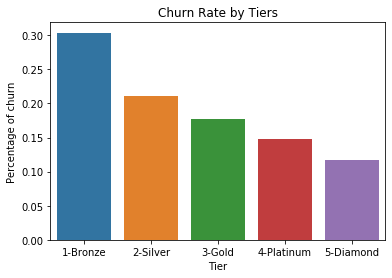

As expected, the churn rate is high for the bottom tier( Bronze ) 
and low for the top tier( Diamond)


In [168]:
temp_df = churn_df.groupby(['tier'])['churn_year_plus1_ind'].mean().reset_index()
sns.barplot(x='tier',y='churn_year_plus1_ind',data=temp_df)
plt.title('Churn Rate by Tiers')
plt.xlabel('Tier')
plt.ylabel('Percentage of churn')
plt.show()
print('As expected, the churn rate is high for the bottom tier( Bronze ) \nand low for the top tier( Diamond)')

In [185]:
churn_df.select_dtypes(include=['object','category']).columns

Index(['ST', 'Zip', 'DMA', 'Area_Cd', 'tier', 'tier_prev', 'acct_ID', 'activation_date', 'event_date'], dtype='object')

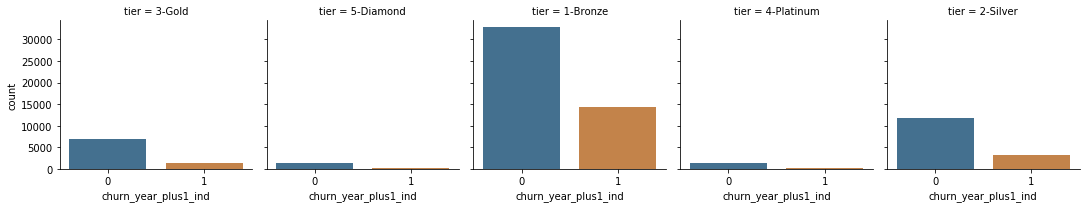

There is association between tier and  churn_year_plus1_ind
The strength of the assocation is 0.13
 
 


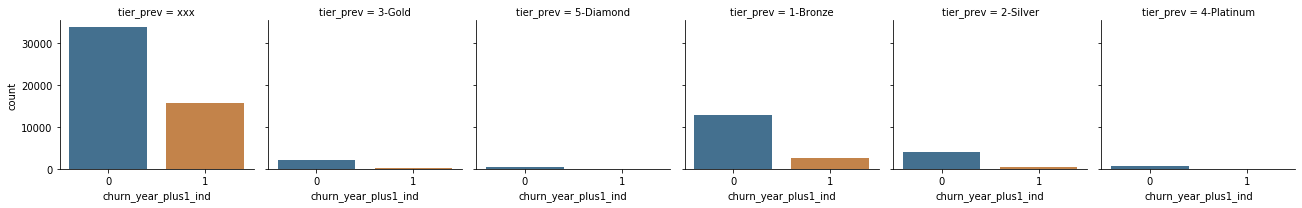

There is association between tier_prev and  churn_year_plus1_ind
The strength of the assocation is 0.19
 
 


('tier_prev', 0.19, 0.0)

In [190]:
categorical_association(churn_df,'tier','churn_year_plus1_ind')
categorical_association(churn_df,'tier_prev','churn_year_plus1_ind')

#### Checking skewness to explore distribution of numeric variables in churn data:

In [191]:
numeric_cols=churn_df.select_dtypes(include='float64')
print('The skewness of the  variables before transformation are ')
print('')
skewness=churn_df.skew(axis = 0, skipna = True,numeric_only=True).sort_values(ascending=False) 
print(skewness)

The skewness of the variables are 

purch_avg_36mo              58.57
purch_amt_36mo              56.48
purch_amt_life              28.19
call_in_mo_36mo             18.27
order_cnt_36mo              12.45
purch_avg_interval          11.75
purch_cnt_cc_36mo            5.93
resp_cnt_36mo                5.10
call_out_mo_36mo             3.44
fixd_incm_flg                2.83
purch_cnt_life               2.73
purch_cnt_et_36mo            2.66
purch_cnt_ck_36mo            2.34
purch_cnt_tt_36mo            2.26
months_since_last_trans      1.62
mail_cnt_36mo                1.12
churn_year_plus1_ind         1.08
scheduled_purchase_flg       1.07
months_since_first_trans     0.69
emailable                   -0.07
solicit_ph_ind              -2.52
solicit_email_ind           -4.96
dtype: float64


### Feature Engineering on the churn data

In [193]:
#when avg interval = -1 replace with 36 months
churn_df['purch_avg_interval'].replace([-1], 36, inplace=True)

#when avg purchase = -1 replace with 0 
churn_df['purch_avg_36mo'].replace([-1], 0, inplace=True)

#Variable Transformations
churn_df['log_order_cnt_36mo']=np.log10(churn_df['order_cnt_36mo']+1)
churn_df['log_purch_amt_36mo']=np.log10(churn_df['purch_amt_36mo']+1)
churn_df['log_purch_amt_life']=np.log10(churn_df['purch_amt_life']+1)
churn_df['log_purch_avg_36mo']=np.log10(churn_df['purch_avg_36mo']+1)
churn_df['log_purch_cnt_life']=np.log10(churn_df['purch_cnt_life']+1)
churn_df['log_purch_cnt_tt_36mo']=np.log10(churn_df['purch_cnt_tt_36mo']+1)
churn_df['log_resp_cnt_36mo']=np.log10(churn_df['resp_cnt_36mo']+1)


#creating percentages column
churn_df['perc_purch_cc_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_cc_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_ck_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_ck_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_et_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_et_36mo']/churn_df['purch_cnt_tt_36mo'])

#Dropping insignicant columns
churn_df = churn_df.drop(['order_cnt_36mo','purch_amt_36mo','purch_amt_life','purch_avg_36mo','purch_cnt_life',
                          'purch_cnt_tt_36mo','resp_cnt_36mo',
                          'purch_cnt_cc_36mo','purch_cnt_ck_36mo','purch_cnt_et_36mo'],axis=1)


In [194]:
print(" summary stats on churn data ") 
print(churn_df.describe(include='float').transpose())

 summary stats on churn data 
                         count  mean   std  min   25%   50%   75%     max
purch_avg_interval     73481.0  4.85  9.96  0.0  1.00  1.21  2.56  165.00
log_order_cnt_36mo     73481.0  0.74  0.29  0.0  0.60  0.70  0.90    2.68
log_purch_amt_36mo     73481.0  2.60  0.65  0.0  2.21  2.71  3.03    5.76
log_purch_amt_life     73481.0  2.86  0.79  0.0  2.34  2.91  3.43    6.03
log_purch_avg_36mo     73481.0  1.54  0.35  0.0  1.32  1.42  1.68    4.70
log_purch_cnt_life     73481.0  1.40  0.60  0.3  0.95  1.43  1.87    3.16
log_purch_cnt_tt_36mo  73481.0  1.14  0.43  0.0  0.85  1.23  1.53    2.80
log_resp_cnt_36mo      73481.0  0.33  0.45  0.0  0.00  0.00  0.60    2.37
perc_purch_cc_36mo     73481.0  0.31  0.44  0.0  0.00  0.00  0.93    1.00
perc_purch_ck_36mo     73481.0  0.56  0.47  0.0  0.00  0.92  1.00    2.00
perc_purch_et_36mo     73481.0  0.13  0.32  0.0  0.00  0.00  0.00    1.00


In [196]:
numeric_cols=churn_df.select_dtypes(include='float64')
print('The skewness of the variables after the log transforation are ')
print('')
skewness=churn_df.skew(axis = 0, skipna = True,numeric_only=True).sort_values(ascending=False) 
print(skewness)

The skewness of the variables after the log transforation are 

call_in_mo_36mo             18.27
call_out_mo_36mo             3.44
purch_avg_interval           3.41
fixd_incm_flg                2.83
perc_purch_et_36mo           2.13
months_since_last_trans      1.62
log_purch_avg_36mo           1.56
log_resp_cnt_36mo            1.14
mail_cnt_36mo                1.12
churn_year_plus1_ind         1.08
scheduled_purchase_flg       1.07
perc_purch_cc_36mo           0.82
log_order_cnt_36mo           0.77
months_since_first_trans     0.69
emailable                   -0.07
log_purch_amt_life          -0.13
log_purch_cnt_life          -0.15
perc_purch_ck_36mo          -0.22
log_purch_amt_36mo          -0.29
log_purch_cnt_tt_36mo       -0.60
solicit_ph_ind              -2.52
solicit_email_ind           -4.96
dtype: float64


## Margin data

            1. Importing the dataframe
            2. Modify margin data to only have ANNUAL margin numbers
            3. Looking at descriptive statistics of numeric and categorical attributes
            4. Checking for the skewness in the numerical variables
            5. Variables tranformations if the data is skewed
            6. Checking the skewness in the transformed variables
            7. Dropping the unnecessary columns

In [170]:
margin_df=pd.read_csv("margin_data.csv")
## Use head method to view margin dataframe:
margin_df.head()

,trans_amt_t_minus_00,trans_amt_t_minus_01,trans_amt_t_minus_02,trans_amt_t_minus_03,trans_amt_t_minus_04,trans_amt_t_minus_05,trans_amt_t_minus_06,trans_amt_t_minus_07,trans_amt_t_minus_08,trans_amt_t_minus_09,trans_amt_t_minus_10,trans_amt_t_minus_11,trans_amt_t_minus_12,trans_amt_t_minus_13,trans_amt_t_minus_14,trans_amt_t_minus_15,trans_amt_t_minus_16,trans_amt_t_minus_17,trans_amt_t_minus_18,trans_amt_t_minus_19,trans_amt_t_minus_20,trans_amt_t_minus_21,trans_amt_t_minus_22,trans_amt_t_minus_23,trans_amt_t_minus_24,...,cost_amt_t_minus_11,cost_amt_t_minus_10,cost_amt_t_minus_09,cost_amt_t_minus_08,cost_amt_t_minus_07,cost_amt_t_minus_06,cost_amt_t_minus_05,cost_amt_t_minus_04,cost_amt_t_minus_03,cost_amt_t_minus_02,cost_amt_t_minus_01,cost_amt_t_minus_00,cost_amt_t_plus_01,cost_amt_t_plus_02,cost_amt_t_plus_03,cost_amt_t_plus_04,cost_amt_t_plus_05,cost_amt_t_plus_06,cost_amt_t_plus_07,cost_amt_t_plus_08,cost_amt_t_plus_09,cost_amt_t_plus_10,cost_amt_t_plus_11,cost_amt_t_plus_12,acct_ID
0,0.0,1961.0,6110.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3882.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,600.25,584.71,584.71,584.71,584.71,584.71,584.71,584.71,606.11,592.50,584.71,0.00,0.00,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.30,0.00,0.00,B102465045
1,0.0,0.0,0.0,40.0,0.0,400.0,200.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,949.0,135.0,...,598.94,598.68,598.68,598.68,599.88,599.58,599.28,598.98,600.05,601.37,601.37,598.98,14.49,14.27,14.76,13.97,15.69,14.87,14.79,14.57,14.27,14.27,14.76,14.53,B106897643
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,8.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.91,2.87,0.00,0.00,0.00,0.00,B111832829
3,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,2.10,1.50,3.29,1.58,1.83,1.47,4.45,1.40,1.54,3.95,1.16,1.78,4.46,2.10,5.17,1.29,0.26,0.00,0.00,0.00,0.00,0.30,0.00,0.30,B112883062
4,0.0,0.0,0.0,600.0,0.0,0.0,0.0,700.0,300.0,300.0,300.0,300.0,300.0,300.0,2160.0,0.0,0.0,0.0,0.0,0.0,600.0,300.0,0.0,300.0,600.0,...,605.41,604.44,599.99,600.91,604.18,599.21,598.68,599.20,600.05,601.63,598.94,598.98,15.09,14.87,15.06,15.04,15.09,15.94,18.68,15.94,15.30,17.72,15.06,15.90,B113581008


### Modify margin data to only have ANNUAL margin numbers
            
            1. Margin in the past 12 months
            2. Margin in the past 13-24 months
            3. Margin in the past 25-36 months
            4. Margin in the coming 12 months
            
            Subsetting only the above 4 margins 


#### 1. Margin in the past 12 months

In [171]:
#calculating revenue from the customers in the first 12months
margin_df['rev_Y_neg_1']=margin_df['trans_amt_t_minus_00']+margin_df['trans_amt_t_minus_01']+margin_df['trans_amt_t_minus_02']+margin_df['trans_amt_t_minus_03']+margin_df['trans_amt_t_minus_04']+margin_df['trans_amt_t_minus_05']+margin_df['trans_amt_t_minus_06']+margin_df['trans_amt_t_minus_07']+margin_df['trans_amt_t_minus_08']+margin_df['trans_amt_t_minus_09']+margin_df['trans_amt_t_minus_10']+margin_df['trans_amt_t_minus_11']
#calculating cost spent from the customers in the first 12months
margin_df['cost_Y_neg_1']=margin_df['cost_amt_t_minus_00']+margin_df['cost_amt_t_minus_01']+margin_df['cost_amt_t_minus_02']+margin_df['cost_amt_t_minus_03']+margin_df['cost_amt_t_minus_04']+margin_df['cost_amt_t_minus_05']+margin_df['cost_amt_t_minus_06']+margin_df['cost_amt_t_minus_07']+margin_df['cost_amt_t_minus_08']+margin_df['cost_amt_t_minus_09']+margin_df['cost_amt_t_minus_10']+margin_df['cost_amt_t_minus_11']
#Margin is the difference between the Revenue and the cost
margin_df['margin_Y_neg_1']=margin_df['rev_Y_neg_1']-margin_df['cost_Y_neg_1']

#### 2. Margin in the past 13-24 months

In [172]:
#calculating revenue from the customers in the between 13-24 months
margin_df['rev_Y_neg_2']=margin_df['trans_amt_t_minus_12']+margin_df['trans_amt_t_minus_13']+margin_df['trans_amt_t_minus_14']+margin_df['trans_amt_t_minus_15']+margin_df['trans_amt_t_minus_16']+margin_df['trans_amt_t_minus_17']+margin_df['trans_amt_t_minus_18']+margin_df['trans_amt_t_minus_19']+margin_df['trans_amt_t_minus_20']+margin_df['trans_amt_t_minus_21']+margin_df['trans_amt_t_minus_22']+margin_df['trans_amt_t_minus_23']
#calculating cost spent from the customers in between 13-24 months
margin_df['cost_Y_neg_2']=margin_df['cost_amt_t_minus_12']+margin_df['cost_amt_t_minus_13']+margin_df['cost_amt_t_minus_14']+margin_df['cost_amt_t_minus_15']+margin_df['cost_amt_t_minus_16']+margin_df['cost_amt_t_minus_17']+margin_df['cost_amt_t_minus_18']+margin_df['cost_amt_t_minus_19']+margin_df['cost_amt_t_minus_20']+margin_df['cost_amt_t_minus_21']+margin_df['cost_amt_t_minus_22']+margin_df['cost_amt_t_minus_23']
#Margin is the difference between the Revenue and the cost
margin_df['margin_Y_neg_2']=margin_df['rev_Y_neg_2']-margin_df['cost_Y_neg_2']

#### 3. Margin in the past 25-36 months

In [173]:
#calculating revenue from the customers in the between 13-24 months
margin_df['rev_Y_neg_3']=margin_df['trans_amt_t_minus_24']+margin_df['trans_amt_t_minus_25']+margin_df['trans_amt_t_minus_26']+margin_df['trans_amt_t_minus_27']+margin_df['trans_amt_t_minus_28']+margin_df['trans_amt_t_minus_29']+margin_df['trans_amt_t_minus_30']+margin_df['trans_amt_t_minus_31']+margin_df['trans_amt_t_minus_32']+margin_df['trans_amt_t_minus_33']+margin_df['trans_amt_t_minus_34']+margin_df['trans_amt_t_minus_35']
#calculating cost spent from the customers in between 13-24 months
margin_df['cost_Y_neg_3']=margin_df['cost_amt_t_minus_24']+margin_df['cost_amt_t_minus_25']+margin_df['cost_amt_t_minus_26']+margin_df['cost_amt_t_minus_27']+margin_df['cost_amt_t_minus_28']+margin_df['cost_amt_t_minus_29']+margin_df['cost_amt_t_minus_30']+margin_df['cost_amt_t_minus_31']+margin_df['cost_amt_t_minus_32']+margin_df['cost_amt_t_minus_33']+margin_df['cost_amt_t_minus_34']+margin_df['cost_amt_t_minus_35']
#Margin is the difference between the Revenue and the cost
margin_df['margin_Y_neg_3']=margin_df['rev_Y_neg_3']-margin_df['cost_Y_neg_3']

#### 4. Margin in the coming 12 months

In [174]:
#calculating revenue from the customers in the coming 12 months
margin_df['rev_Y_pos_1']=margin_df['trans_amt_t_plus_01']+margin_df['trans_amt_t_plus_02']+margin_df['trans_amt_t_plus_03']+margin_df['trans_amt_t_plus_04']+margin_df['trans_amt_t_plus_05']+margin_df['trans_amt_t_plus_06']+margin_df['trans_amt_t_plus_07']+margin_df['trans_amt_t_plus_08']+margin_df['trans_amt_t_plus_09']+margin_df['trans_amt_t_plus_10']+margin_df['trans_amt_t_plus_11']+margin_df['trans_amt_t_plus_12']
#calculating cost spent from the customers in the coming 12 months
margin_df['cost_Y_pos_1']=margin_df['cost_amt_t_plus_01']+margin_df['cost_amt_t_plus_02']+margin_df['cost_amt_t_plus_03']+margin_df['cost_amt_t_plus_04']+margin_df['cost_amt_t_plus_05']+margin_df['cost_amt_t_plus_06']+margin_df['cost_amt_t_plus_07']+margin_df['cost_amt_t_plus_08']+margin_df['cost_amt_t_plus_09']+margin_df['cost_amt_t_plus_10']+margin_df['cost_amt_t_plus_11']+margin_df['cost_amt_t_plus_12']
#Margin is the difference between the Revenue and the cost
margin_df['margin_Y_pos_1']=margin_df['rev_Y_pos_1']-margin_df['cost_Y_pos_1']


#### Subsetting only the annual margin from the customers

In [177]:
margin_df = margin_df[['acct_ID','margin_Y_neg_1','margin_Y_neg_2','margin_Y_neg_3','margin_Y_pos_1']]

print('\033[1m'+ " summary stats on margin data ") 
print(margin_df[['margin_Y_neg_1', 'margin_Y_neg_2', 'margin_Y_neg_3', 'margin_Y_pos_1']].describe(include='all').transpose())

 summary stats on margin data 
                  count    mean      std       min    25%     50%     75%        max
margin_Y_neg_1  73481.0  229.17  1590.26 -18624.22  43.12  182.31  338.27  197543.65
margin_Y_neg_2  73481.0  194.08  1696.54  -7675.16   0.00  122.92  294.78  203656.57
margin_Y_neg_3  73481.0  158.68  1392.78  -6902.63   0.00   26.17  243.63  194459.00
margin_Y_pos_1  73481.0  357.21  1720.88  -2679.10  -2.21  162.27  332.86  199704.96


#### Checking skewness to explore distribution of numeric variables in churn data:

In [178]:
numeric_cols=margin_df.select_dtypes(include='float64')
print('The skewness of the variables are ')
print('')
skewness=margin_df.skew(axis = 0, skipna = True,numeric_only=True).sort_values(ascending=False) 
print(skewness)

The skewness of the variables are 

margin_Y_neg_3    72.95
margin_Y_neg_2    63.62
margin_Y_neg_1    60.26
margin_Y_pos_1    60.16
dtype: float64


#### Feature engineering on margin data
        
        Using logs with an offset that will account for very large negative margins:

In [200]:
#calculating average margin across the 3 years
margin_df['margin_3yr_avg']=(margin_df['margin_Y_neg_1']+margin_df['margin_Y_neg_2']+margin_df['margin_Y_neg_3'])/3

#Adding offset value to convert negative margins to positive value for log transformatioms
margin_df['log_margin_Y_neg_1']=np.log10(margin_df['margin_Y_neg_1']+50000)
margin_df['log_margin_Y_neg_2']=np.log10(margin_df['margin_Y_neg_2']+50000)
margin_df['log_margin_Y_neg_3']=np.log10(margin_df['margin_Y_neg_3']+50000)
margin_df['log_margin_3yr_avg']=np.log10(margin_df['margin_3yr_avg']+50000)
margin_df['log_margin_Y_pos_1']=np.log10(margin_df['margin_Y_pos_1']+50000)

#### Checking skewness to explore distribution of numeric variables in churn data:

In [201]:
numeric_cols=margin_df.select_dtypes(include='float64')
print('The skewness of the variables are ')
print('')
skewness=margin_df.skew(axis = 0, skipna = True,numeric_only=True).sort_values(ascending=False) 
print(skewness)

The skewness of the variables are 

margin_Y_neg_3        72.95
margin_Y_neg_2        63.62
margin_3yr_avg        61.49
margin_Y_neg_1        60.26
margin_Y_pos_1        60.16
log_margin_Y_pos_1    26.91
log_margin_3yr_avg    24.07
log_margin_Y_neg_3    22.07
log_margin_Y_neg_2    21.72
log_margin_Y_neg_1    18.01
dtype: float64


### Visualizing whether the prior margin has an impact on the future margin
        
        Scatter plot on Future Margin vs Prior Margin (logarithms):

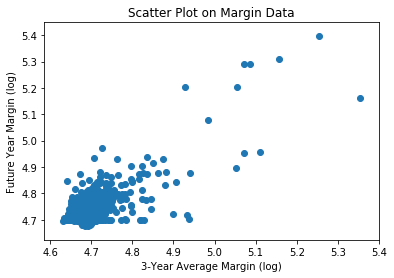

In [202]:
plt.scatter(margin_df['log_margin_3yr_avg'], margin_df['log_margin_Y_pos_1'])
plt.xlabel("3-Year Average Margin (log)")
plt.ylabel("Future Year Margin (log)")
plt.title("Scatter Plot on Margin Data")
plt.show()

## Merging the churn data with the margin data

In [69]:
churn_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
churn_df.shape

(73384, 31)

In [70]:
margin_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
margin_df.shape

(73384, 11)

## Join Churn and Margin data by acct_ID:

In [71]:
combined_df = pd.merge(churn_df, margin_df, on='acct_ID', how='inner')
combined_df.shape

(73384, 41)

## Create dummy variables for certain categorical variables.

In [7]:
""" WARNING: this commented-out approach would create dummy indicators for all """
"""    categorical variables, including those with very high cardinality, such as zip codes """
"""    and also would drop the original categorical variables and only keep the dummy indicators """

""" combined_df = pd.get_dummies(combined_df) """

""" this approach hand-picks only certain variables for which to create dummy indicators """
""" and keeps the original variables too """

for column in ['ST', 'tier', 'tier_prev']:
    dummies = pd.get_dummies(combined_df[column],prefix=column)
    combined_df[dummies.columns] = dummies

print(" ") 
print("New dataset with dummies") 
print(" ") 
print(combined_df.head(10)) 
print(" ") 
print("Columns in new data")
print(" ") 
print(combined_df.dtypes)

NameError: name 'combined_df' is not defined

## export updated data as new csv file

In [82]:
combined_df.to_csv('combined_data.csv',index=False)